<h3>Lab 10</h3>

## Let's get Physical!

<div>
    <img src="physical_activity_qfacts.png" width=400><br><br>
</div>

In this lab we will investigate some relationships between health risk factors using data from the Australian Government's *[Australian Institute of Health and Welfare](https://www.aihw.gov.au)*. (AIHW)

_Note: This is a shorter lab to finish up with and has a different due date to other labs._



## Data acquisition and cleaning

Go to the AIHW website and navigate to Reports and Data > Behaviours and Risk factors. Notice that this site provides a range of information on the relationship between behaviours, such as smoking or physical activity, and health risk.

Follow the link to Risk Factors > Reports. Scroll down to "Risk factors to health" (2017) and open the report.

Here you will find further information on the five leading risk factors for ill-health. The 'Data' link provides the source data for the study.

* Download the Source Data tables

You should now have the file `risk-factors-2014-15-source-data.xls`.

Open the spreadsheet and inspect the table of contents. You should find the nine tables listed on the "Risk factors to health" report website.

Save the spreadsheet in `.xslx` format, and upload it to the Health lab directory in CoCalc.



### Reading the data into a `pandas` DataFrame

We will investigate the data using `pandas`, beginning with the data on physical activity (Table 5). This time we'll take the data directly from the `xlsx` file! (Rather than using a 'flat file' format like csv as an interlingua).

As usual you will want to start by importing some packages. It is also suggested you start with some constants to ease access to the data. We'll use the following:



In [3]:
SOURCE = "risk-factors-2014-15-source-data.xlsx"
TABLES = {3: "Table 3_Alcohol",
          4: "Table 4_Smoking",
          5: "Table 5_Physical activity",
          6: "Table 6_Dyslipidaemia",
         }

Open the [pandas API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) reference, and find **Excel** in the **Input/Output** listing.
You should by now be used to reading APIs and anticipating the kinds of arguments you will find in the functions.

* Use `read_excel()` to read in Table 5 using its sheet name, which you can extract from the above TABLES dictionary. (You should use SOURCE and TABLES, not type in the strings.)

You should use other arguments to ensure that:

  * the first line is skipped over and the second line is used for the *column labels*
  * only the first 4 columns are included
  * the first (zeroth) column is used for the *index*
  * the notes at the bottom are excluded

* Check the table shape, and use the `head()` function to view the table. (Look for how to do both of these in the API.)

It should contain the following data (but presented in a nicer looking table format):

```
                             Men Women  Persons
Population characteristics                     
Age group (years)(a)(b)      NaN   NaN      NaN
18–24                       45.4  50.7     48.0
25–34                       43.9    49     46.5
35–44                       53.3  53.6     53.4
45–54                       56.8  56.2     56.6
55–64                         54  59.7     56.5
65+                         73.5  76.9     75.0
All persons (18–64)         50.6  53.7     52.2
All persons (18+)              —     —     56.4
Remoteness(a)                NaN   NaN      NaN
Major cities                  47  52.4     49.7
Inner regional              59.1  56.7     57.9
Outer regional and remote   63.9  57.4     60.3
Socioeconomic status(a)      NaN   NaN      NaN
Q1 (most disadvantaged)     59.6  66.1     62.6
Q2                            59  54.1     56.7
Q3                          55.4  55.5     55.5
Q4                          44.4    51     47.3
Q5 (least disadvantaged)    37.7  42.6     40.0
Time series (c)(d)           NaN   NaN      NaN
2007–08                        —     —     49.1
2011–12                        —     —     45.3
2014–15                        —     —     44.3
```

Is the reported shape what you expected?



In [4]:
import pandas as pd

In [5]:
df=pd.read_excel(SOURCE,sheet_name=5,skiprows=1,skipfooter=8,usecols=range(0,4))
df.shape

(23, 4)

The "subheadings" in the spreadsheet (such as **Age group (years)**) are just string data. They can be distinguished in our pandas table by the fact that the corresponding data fields contain `np.NaN`.

* Under DataFrame in the pandas API, find the "**Missing data handling**" section for Dataframes, and use `dropna()` to drop the subheading rows (those with `NaN` in them).

Your table should now begin with:

```
                             Men Women  Persons
Population characteristics                     
18–24                       45.4  50.7     48.0
25–34                       43.9    49     46.5
35–44                       53.3  53.6     53.4
45–54                       56.8  56.2     56.6
55–64                         54  59.7     56.5
65+                         73.5  76.9     75.0
All persons (18–64)         50.6  53.7     52.2
All persons (18+)              —     —     56.4
Major cities                  47  52.4     49.7
Inner regional              59.1  56.7     57.9
...
```

Check the shape again and ensure the change in shape is what you expected.



In [6]:
#drop NAN row
new_df=df.dropna()
new_df.shape

(19, 4)

#### dtypes

* Use the DataFrame's `dtypes` attribute to check the data types of your data columns.

What do you notice? Why has this occurred?

In [7]:
new_df.dtypes

Population characteristics     object
Men                            object
Women                          object
Persons                       float64
dtype: object

Let's see if we can bludgeon pandas into using the 'right' dtype. In fact, since the numbers are not high precision, just for now, let's set them to 32 bit floats and save some storage space. Look for the `dtype` argument in `read_excel` to see how to set the dtype.

- Using the `dtype` argument, explicitly set the dtype for the Men, Women and Persons columns to 32 bit floats. Use a different variable name (eg `risks2`) to avoid confusion with the above table.

What do you find and why?

In [8]:
import numpy as np

In [9]:
#risk2=pd.read_excel(SOURCE,sheet_name=5,skiprows=1,index_col=0,skipfooter=8,usecols=range(0,4),dtype={'Men':np.float,'Women':float,'Persons':float})



It should be clear now what the problem was, and why pandas chose the type `Object`. Let's try again.

* Read the table in again using `read_excel()`. This time set the parameter `na_values='-'`. Read the API to see what this does. (You can go back to the default float size.)

Again, use a different variable name (eg `risks3`) to avoid confusion with the previous table.

Check the dtypes. Did it work?

In [10]:
risk3=pd.read_excel(SOURCE,sheet_name=TABLES[5],index_col=0,skiprows=1,skipfooter=8)
risk3

,Men,Women,Persons
Population characteristics,,,
Age group (years)(a)(b),NaN,NaN,NaN
18–24,45.4,50.7,48.0
25–34,43.9,49,46.5
35–44,53.3,53.6,53.4
45–54,56.8,56.2,56.6
55–64,54,59.7,56.5
65+,73.5,76.9,75.0
All persons (18–64),50.6,53.7,52.2
All persons (18+),—,—,56.4


This is a good example of the need for caution when trusting "what you see" in string or character data.

There are in fact many kinds of dashes in Unicode, and its very difficult to tell from looking at it what kind of dash the spreadsheet has used.

* Use Dataframe's `loc()` method to extract one of the dashes from your table. (Print it to make sure.)

_Tip: `loc()` can be found under **Indexing, iteration** in the DataFrame API._

* Use python's `ord()` method to find the Unicode number of the character you extracted from the table. What is its Unicode number?
* To check, use python's `chr()` method to convert the Unicode number back into a character, and print it. Does it match the one above?
* Is this the same Unicode value as the dash used in the age groups?

In [11]:
#loc attribute to return one or more specified row(s)
unicode=risk3.loc['All persons (18+)','Men']
dash_like=ord(unicode)
codechar=chr(dash_like)
codechar


'—'

We can now read in the table again (to `risks4)`.

* Use `read_excel()` to read in Table 5, but this time set `na_values` to the correct character.

*Hint: You will need to use `chr()`*.
    
Have a look at your dataframe and ensure that the dashes have been replaced by NaN.

Check that the dtypes are now correct.

Notice that there are now some rows which have all NaNs, and some which have some NaNs and some data.

* Once again use `dropna()` to remove the 'subheader' rows. However this time use '`how`' to ensure that only the correct rows are removed (for example, the "All persons (18+)" row should not be removed)

Check the shape and the dtypes. Are they now what you would expect (the data should all be floats)? If not, ensure they are before proceeding.

You may have used `skipfooter` to exclude the reference notes at the bottom of the table.

Have a look at the other spreadsheets for tables 3 to 6. You should see that the formats are the same, but there are different numbers of notes at the bottom.

`skipfooter` will therefore not work if we want to reuse (_generalise_) the code to work for these other tables in workbook.

* How else might the reference rows be removed?

*Hint: No extra coding needed!*

### Q1. Putting it all together [1 lab mark]

* Write a function `load_and_clean(tablenum)` that takes a table number and returns a dataframe for that table with:
  * subheading rows removed
  * reference section removed
  * all data as `float64`

You should ensure this works on tables 3 to 6.

In [12]:
def load_and_clean(tablenum):
    data=pd.read_excel(SOURCE,sheet_name=tablenum,skiprows=1,index_col=0,usecols=range(0,4),na_values=chr(8212),dtype={'Men':np.float64,'Women':np.float64,'Persons':np.float64})
    removenan=data.dropna(axis=0,how='all')
    return removenan

load_and_clean(5)

,Men,Women,Persons
Population characteristics,,,
18–24,45.4,50.7,48.0
25–34,43.9,49.0,46.5
35–44,53.3,53.6,53.4
45–54,56.8,56.2,56.6
55–64,54.0,59.7,56.5
65+,73.5,76.9,75.0
All persons (18–64),50.6,53.7,52.2
All persons (18+),NaN,NaN,56.4
Major cities,47.0,52.4,49.7


In [13]:
from nose.tools import assert_equal, assert_true

assert_equal(load_and_clean(5).shape, (19, 3))
assert_equal(load_and_clean(6).shape, (16, 3))
assert_equal(load_and_clean(5).dtypes["Women"], np.float64)
assert_true(np.isnan(load_and_clean(5).loc["All persons (18+)","Men"]))
assert_true(np.isclose(load_and_clean(5).iloc[-1]["Persons"],44.3))
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


## Data selection and visualisation

Let's start with a fresh copy of the physical activity table:

```
exercise = load_and_clean(5)
```

* Extract the first 6 rows of the Physical activity table into a new dataframe called `age_groups`.

_Tip: We've used `loc[]` already. Check out the difference between `iloc[]` and `loc[]`._

Check that your new table is correct.



In [33]:
exercise=load_and_clean(5)
#exercise[0:6]
age_groups=exercise.iloc[0:6]
age_groups

,Men,Women,Persons
Population characteristics,,,
18–24,45.4,50.7,48.0
25–34,43.9,49.0,46.5
35–44,53.3,53.6,53.4
45–54,56.8,56.2,56.6
55–64,54.0,59.7,56.5
65+,73.5,76.9,75.0


* Use the default `Dataframe.plot()` method on your `age_groups` dataframe and show the results.



<AxesSubplot:xlabel='Population characteristics'>

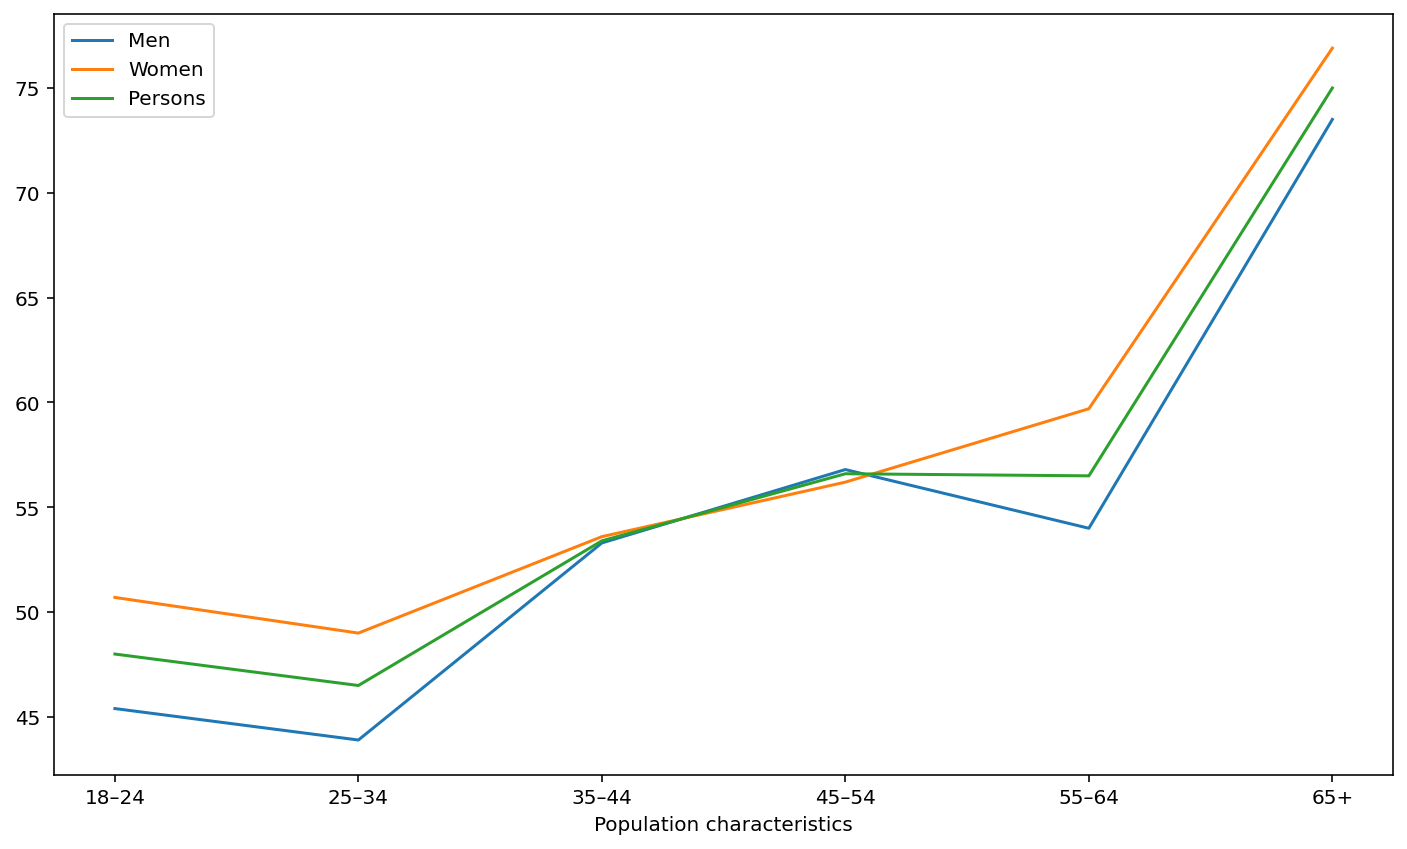

In [15]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
age_groups.plot()

You should see three lines that appear to show a strong (though not linear) relationship between age and "insufficient" physical activity.

Looking at the x-axis, it might also look as if the dataframe's plot method has worked out that the indices represent age groups on a number line. But don't be fooled!

We just got lucky! As far as pandas is concerned, they are just independent categories of some sort. It just happens they were in age order in the spreadsheet.

To verify this, let's see what happens when they're in a different order. Try:

```
age_groups2 = exercise.iloc[[0,1,2,5,4,3]]    # see what we did there? (recall numpy selection with arrays of indices)
```

where `exercise` is again the cleaned Table 5.

Inspect the table and plot the corresponding plot.



You should see quite a different picture.

In fact, it's a little misleading to plot our (categorical) age data as a line plot - the adjoining lines suggest relationships that don't exist. Better would be something like a bar chart.

* Repeat your original plot, this time using a bar chart. Use the dataframe sorted on the index to ensure the age groups are in the correct order. (Would this work if you had a category over 100?)

Notice how much easier it is with this kind of data (comparing more than one value per category) than using matplotlib to do the bar chart directly.



<AxesSubplot:xlabel='Population characteristics'>

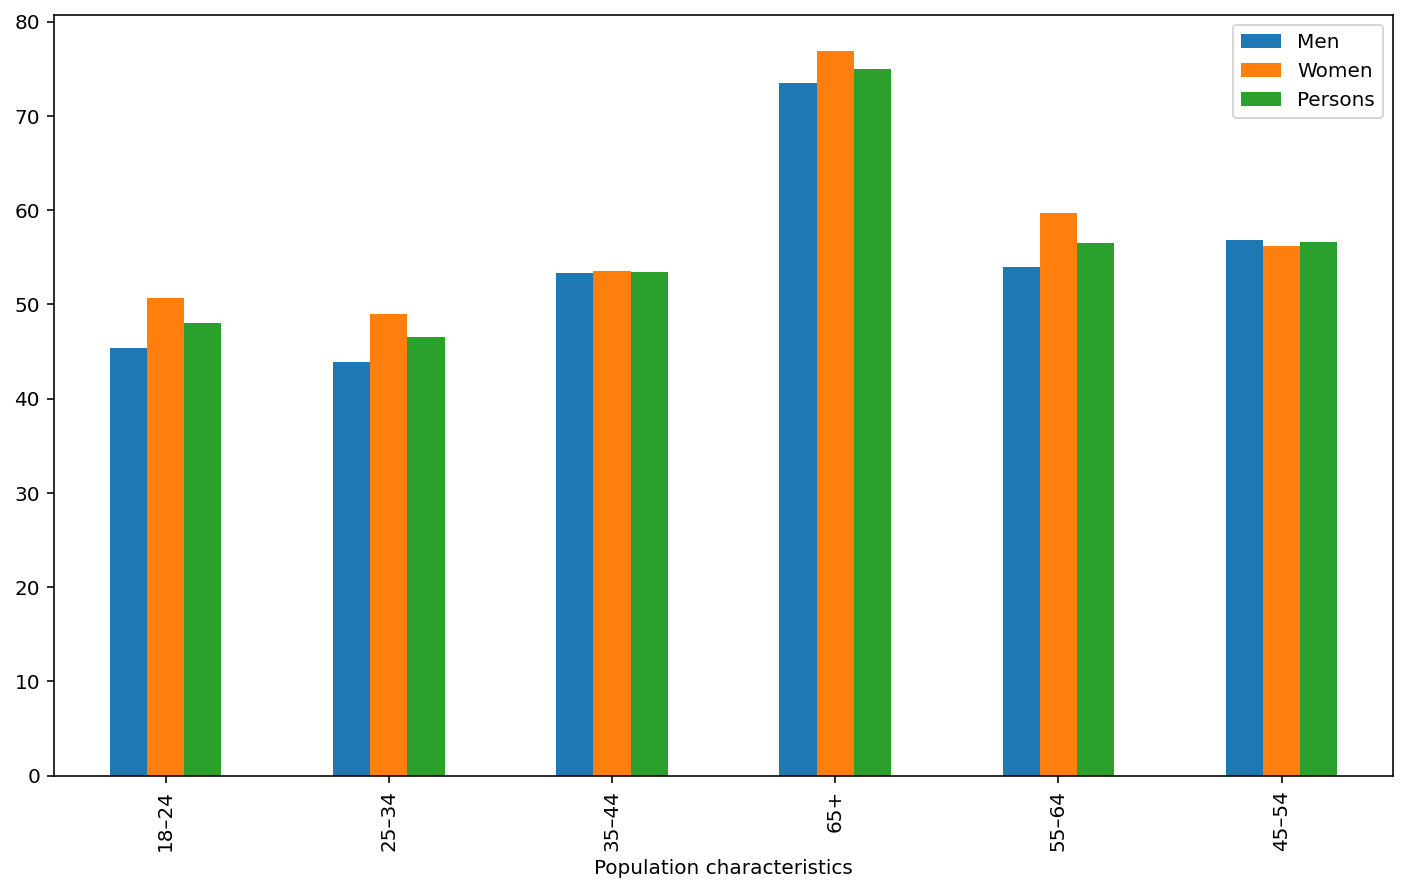

In [16]:
age_group2=exercise.iloc[[0,1,2,5,4,3]]
#age_group2.plot()
age_group2.plot.bar()


### Creating numerical values from the index

While the previous line plot was not the best way to look for relationships, we would like to ascertain whether we can quantitatively establish a relationship between age and physical activity.

To do this, we will convert the index values into numerical values and add them to our table as an extra column.

The first thing we need to do is get the index. Note that the index is not a regular column of the dataframe.

* Get the index using the '`index`' attribute.

* Print the type of the index, the type of one of the elements of the index, and the index itself.

What kind of object is the index?

What kind of object is the first element of the index?


In [17]:
index=age_groups.index
print(type(index[0]),type(index[0]),type(index[-1]))
print(index)

<class 'str'> <class 'str'> <class 'str'>
Index(['18–24', '25–34', '35–44', '45–54', '55–64', '65+'], dtype='object', name='Population characteristics')


For our numerical values, we'll use the midpoint of the age ranges.

For 65+ we know that the data spread will be much wider than the previous categories. For such categories we will adopt a policy of setting the 'midpoint' to 10 more than the start of the last category (75 in this case). This is highly _unsatisfactory!_ (Once again it is not clear why they have simply ignored age categories from 65 upwards - don't be responsible for this kind of ageism in your own work!)

> _Q: If we had a model of population against age, how could we better compensate for this omission?_

To find the midpoints we'll need to parse the age categories. This time we'll do it more elegantly - using regular expressions!

### Regular expressions

We'll use a regular expression to extract the numbers so we can calculate the medians. 

* Import the '`re`' library, and try the following code (where `exercise` is the name of the dataframe):
    

```
m = re.match('(\d+)'+chr(8211)+'(\d+)', exercise.index[0])
(m.group(0), m.group(1), m.group(2))
```

You're not expected to memorise the regular expression language, but read through the [`re` library documentation](https://docs.python.org/3/library/re.html) and identify how this works and what each piece does.



In [18]:
import re
#exercise.index[5]
m = re.match('(\d+)'+chr(8211)+'(\d+)', exercise.index[0])
(m.group(0), m.group(1), m.group(2))

('18–24', '18', '24')

* Try writing a regular expression that matches the "65+" category (and none of the other categories).

_Tip: + has a special meaning in the regular expression language, so you will need to "escape" it to get a literal plus character._

* Generalise this expression as follows:
  * assume that the last category might be another two digit number, such as 80+
     * match any two digits followed by '+'.
  * assume that the last category might be any age (eg 5+ or 105+)
    * match any one or more digits followed by a '+'.

Check that all three of your regular expressions find a match on the 5th line in the index, but not on line 4.

In [19]:
re_last = re.match('(\d+)'+'(\d+)'+'\+', exercise.index[5])
re_last


<re.Match object; span=(0, 3), match='65+'>

#### Adding a new column, and pandas' `Series`

One way to add a new column to our dataframe is to create the column as a `Series` and then add it using the `assign()` method.

A *Series* is like a 1-dimensional version of a dataframe. You can think of each dataframe column, for example, as a series. A series shares many of the same methods as a dataframe. Have a look at the Series API.

There is a second benefit to using a series - we can use its `apply()` method (like we did for dataframes in the lectures) to apply our regular expression to all the elements of the index.

Look at the API for `Index` objects.

* Find the method for converting an Index to a Series, read the documentation, and generate a series from the index of Table 5.

Have a look at the resulting series. You should see that a series contains an index of its own (on the left), and a single column (on the right).

The documentation states: "Create a Series with both index and values equal to the index keys." Can you see this in your result?


The following function converts (or "maps") an age category to a float representing the midpoint (or 10 higher, for an end range). Otherwise it returns NaN. Follow through the code to understand how it works.

In [20]:
def get_mid(category):
    thestring = str(category)                  # safety cast in case the category is passed as the wrong type
    age_range = re.fullmatch('(\d+)'+chr(8211)+'(\d+)', thestring)
    end_range = re.fullmatch('(\d+)\+', thestring)
    if age_range:
        return np.mean([int(age_range.group(1)), int(age_range.group(2))])
    elif end_range:
        return int(end_range.group(1))+10
    else:
        return np.NaN

# Do the following tests give the right answer?
print(get_mid(exercise.index[0]))
print(get_mid(exercise.index[5]))
print(get_mid(exercise.index[6]))

21.0
75
nan


In [21]:
get_mid(exercise.index[0])

21.0

In [22]:
exercise.index

Index(['18–24', '25–34', '35–44', '45–54', '55–64', '65+',
       'All persons (18–64)', 'All persons (18+)', 'Major cities',
       'Inner regional', 'Outer regional and remote',
       'Q1 (most disadvantaged)', 'Q2', 'Q3', 'Q4', 'Q5 (least disadvantaged)',
       '2007–08', '2011–12', '2014–15'],
      dtype='object', name='Population characteristics')

* Use Series' `apply()` method, along with the tools above, to create new series called 'mids' that contains the midpoints of the age categories, and `NaN` otherwise. (~1 line of code)

Check the output on the exercise data, and its type.

In [23]:
exercise_series=exercise.index.to_series()
exercise_series

##to_series() function create a Series with both index and values equal to the index keys useful with map for returning an indexer based on an index


Population characteristics
18–24                                            18–24
25–34                                            25–34
35–44                                            35–44
45–54                                            45–54
55–64                                            55–64
65+                                                65+
All persons (18–64)                All persons (18–64)
All persons (18+)                    All persons (18+)
Major cities                              Major cities
Inner regional                          Inner regional
Outer regional and remote    Outer regional and remote
Q1 (most disadvantaged)        Q1 (most disadvantaged)
Q2                                                  Q2
Q3                                                  Q3
Q4                                                  Q4
Q5 (least disadvantaged)      Q5 (least disadvantaged)
2007–08                                        2007–08
2011–12                               

In [24]:
exercise['Midpoints']=exercise_series.apply(get_mid)
exercise

,Men,Women,Persons,Midpoints
Population characteristics,,,,
18–24,45.4,50.7,48.0,21.0
25–34,43.9,49.0,46.5,29.5
35–44,53.3,53.6,53.4,39.5
45–54,56.8,56.2,56.6,49.5
55–64,54.0,59.7,56.5,59.5
65+,73.5,76.9,75.0,75.0
All persons (18–64),50.6,53.7,52.2,NaN
All persons (18+),NaN,NaN,56.4,NaN
Major cities,47.0,52.4,49.7,NaN


In [25]:
exercise.index[1]

'25–34'

Why does our method also return values for the time series data at the end?

We could refine our regular expression to exclude those, however our function is correctly doing what we asked of it (finding the midpoints)  so we will leave them in. 

It is better practice not to confuse or overburden the role of our function with two quite different tasks: in this case, (1) finding the midpoint of between integers separated by a dash; and (2) deciding which rows of the dataframe we are interested in working with. We will address the latter later.

Finally we can add the column. Check the API for `assign()` and see whether it returns a _copy_ of the dataframe, or modifies the dataframe _in place_. This will determine how you call `assign()`.

* Use `assign(Midpoints = mids)` to create a dataframe with a fourth column named `Midpoints`.

Inspect the resulting dataframe. It should now start like this:
```
                             Men Women  Persons  Midpoints
Population characteristics                                
18–24                       45.4  50.7     48.0       21.0
25–34                       43.9    49     46.5       29.5
35–44                       53.3  53.6     53.4       39.5
45–54                       56.8  56.2     56.6       49.5
55–64                         54  59.7     56.5       59.5
65+                         73.5  76.9     75.0       75.0
All persons (18–64)         50.6  53.7     52.2        NaN
All persons (18+)              —     —     56.4        NaN
...
```

### Filtering

Dataframe's `filter()` method allows us to get a subset of the dataframe using a regular expression on the index.

* Use `filter()` on the dataframe index to extract a new table, `ages`, that contains only the age ranges (from 18-24 through to 65+ in the case of Table 5).

Check that your table is correct. It should now contain:
```

                             Men Women  Persons  Midpoints
Population characteristics                                
18–24                       45.4  50.7     48.0       21.0
25–34                       43.9    49     46.5       29.5
35–44                       53.3  53.6     53.4       39.5
45–54                       56.8  56.2     56.6       49.5
55–64                         54  59.7     56.5       59.5
65+                         73.5  76.9     75.0       75.0
```

*Hint: You may find the `re` `^` and `|` operators useful for this task.*


In [26]:
filtered = exercise.filter(regex='^18|^25|^35|^45|^55|^65', axis=0)
filtered

,Men,Women,Persons,Midpoints
Population characteristics,,,,
18–24,45.4,50.7,48.0,21.0
25–34,43.9,49.0,46.5,29.5
35–44,53.3,53.6,53.4,39.5
45–54,56.8,56.2,56.6,49.5
55–64,54.0,59.7,56.5,59.5
65+,73.5,76.9,75.0,75.0


### Visualising relationships

Now that we have numerical data for age groups and physical activity, we can again look for a relationship.

* Use DataFrame's scatter plot with your `ages` table to plot Persons (y) against the age midpoints (x).

(Note the x-ticks do not need to - and shouldn't - match up with the sample points.)

Does it look like there is a relationship?

* Repeat the plot, this time with a line plot.

### Correlation

The most commonly used correlation is Pearson's correlation. A correlation coefficient nearing +1 indicates a very strong correlation. A correlation nearing -1 indicates a very strong inverse correlation. A correlation coefficient near zero suggests little or no correlation.

To make life easy, dataframes and series include some elementary statistics methods.

DataFrame's `corr()` method produces a correlation matrix of all numerical columns using Pearson's correlation by default.

* Calculate the correlation coefficient matrix for your `ages` table.

What is the correlation coefficient between Midpoints and Persons? How would you express your conclusion from this analysis)?

In [27]:
print(filtered.corr(method='pearson'))
print(0.918991)


                Men     Women   Persons  Midpoints
Men        1.000000  0.966485  0.993077   0.912776
Women      0.966485  1.000000  0.989827   0.914830
Persons    0.993077  0.989827  1.000000   0.918991
Midpoints  0.912776  0.914830  0.918991   1.000000
0.918991


### Q2. Putting it all together [Bonus 2 lab marks]

* Write a function `age_correlation(tablenum, quiet=False)` which:
  * extracts the clean data for Table `tablenum`
  * adds a column with "midpoints" for the year ranges (as specified above)
  * filters a new table with the age-range rows only
  * generates the (Pearson) correlations for the table
  * returns the correlation between age and Persons

* If `quiet=False` then the function should also produce a "report" in which it:
  * prints an appropriate header for the report (generated from the Excel sheet name)
  * prints the table with the age-range data
  * shows a line plot for Persons, Women and Men against age (using age midpoints, not categories), with appropriate title and axis labels
  * prints the correlation matrix
  

Your function should work correctly for any of the tables from Table 3 to Table 6.

The report for Table 5 should look like this:

```
Risk factor: Physical activity

                             Men  Women  Persons  Midpoints
Population characteristics                                 
18–24                       45.4   50.7     48.0       21.0
25–34                       43.9   49.0     46.5       29.5
35–44                       53.3   53.6     53.4       39.5
45–54                       56.8   56.2     56.6       49.5
55–64                       54.0   59.7     56.5       59.5
65+                         73.5   76.9     75.0       75.0
```

<div>
    <img src="Physical activity.png" width=600>

</div>

```
Correlations
                Men     Women   Persons  Midpoints
Men        1.000000  0.966485  0.993077   0.912776
Women      0.966485  1.000000  0.989827   0.914830
Persons    0.993077  0.989827  1.000000   0.918991
Midpoints  0.912776  0.914830  0.918991   1.000000
```



Risk Factor: Smoking
                             Men  Women  Persons  Midpoint
Population characteristics                                
18–24                       12.8   15.1     14.2      21.0
25–34                       22.5   12.1     17.3      29.5
35–44                       20.1   13.4     16.6      39.5
45–54                       19.3   15.5     17.7      49.5
55–64                       17.1   12.4     14.6      59.5
65–74                       10.5    7.0      8.8      69.5
75+                          3.6    4.5      3.6      85.0


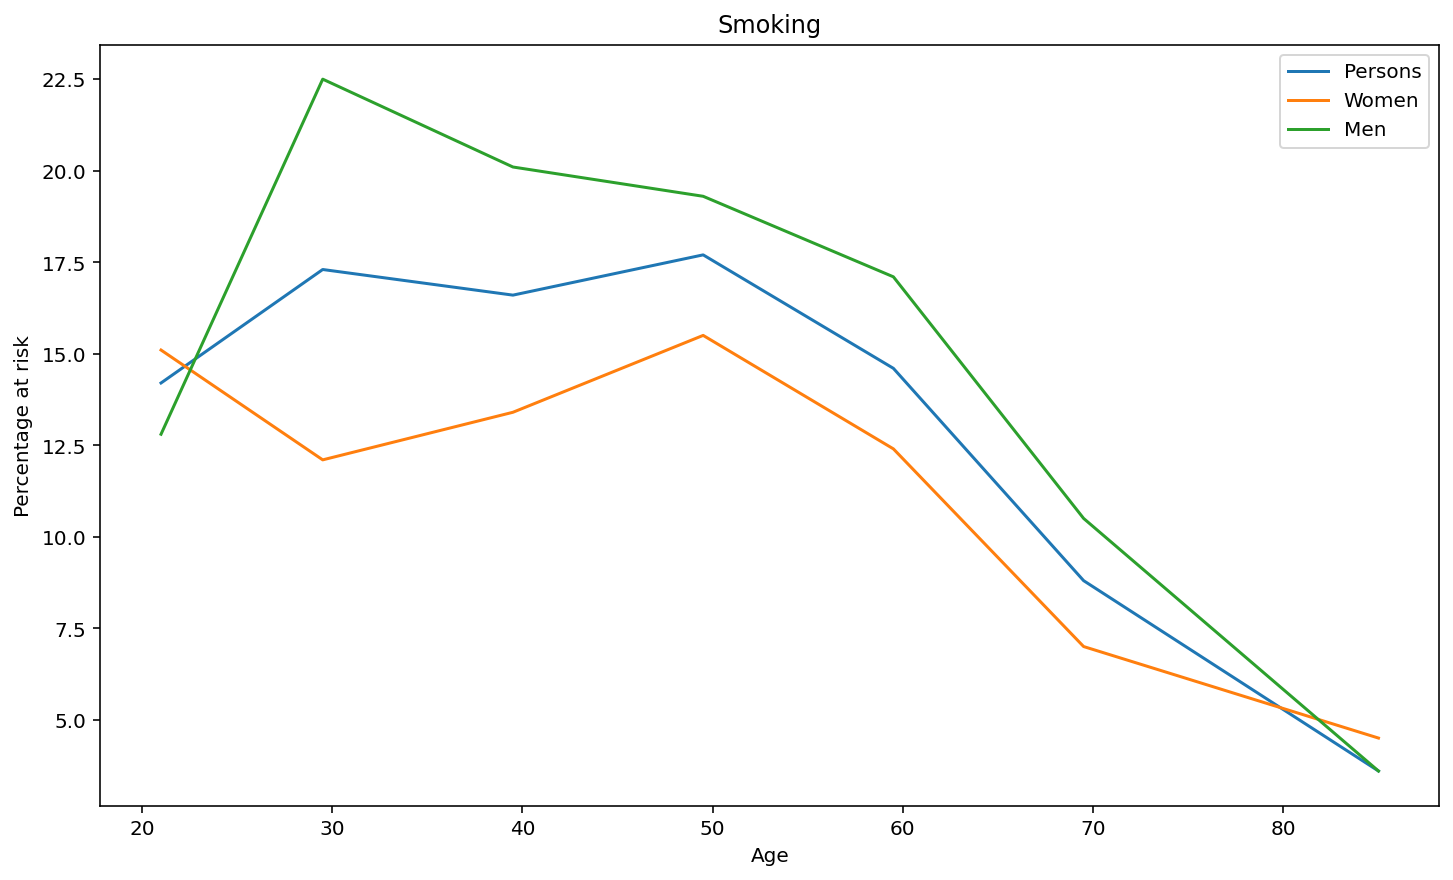

               Men     Women   Persons  Midpoint
Men       1.000000  0.766774  0.958332 -0.686394
Women     0.766774  1.000000  0.916915 -0.823442
Persons   0.958332  0.916915  1.000000 -0.791604
Midpoint -0.686394 -0.823442 -0.791604  1.000000


-0.7916042181257857

In [28]:
def age_correlation (tablenum, quiet=False):
    exercise=load_and_clean(tablenum)
    exercise_series=exercise.index.to_series()
    #print(exercise_series)

    exercise['Midpoint']= exercise_series.apply(get_mid)
    filtered=exercise.filter(regex='^18|^25|^35|^45|^55|^65|^75', axis=0)
    pearsons = filtered.corr(method='pearson')


    if quiet==False:
        sheets = []
        df = pd.read_excel(SOURCE, None)
        title_new='Risk Factor: '+ TABLES[tablenum][8:]
        print(title_new)
        print(filtered)
        filtered.plot('Midpoint',['Persons','Women','Men'])
        plt.title( TABLES[tablenum][8:])
        plt.xlabel('Age')
        plt.ylabel('Percentage at risk')
        plt.show()
        print(pearsons)



    return pearsons.iloc[3,-2]

age_correlation(4,quiet=False)


Risk Factor: Dyslipidaemia
                             Men  Women  Persons  Midpoint
Population characteristics                                
18–24                       30.9   36.3     33.6      21.0
25–34                       51.7   51.2     51.5      29.5
35–44                       69.1   50.0     59.2      39.5
45–54                       73.8   68.2     70.9      49.5
55–64                       74.8   83.0     78.9      59.5
65–74                       78.3   83.5     81.0      69.5
75+                         73.9   80.8     77.7      85.0


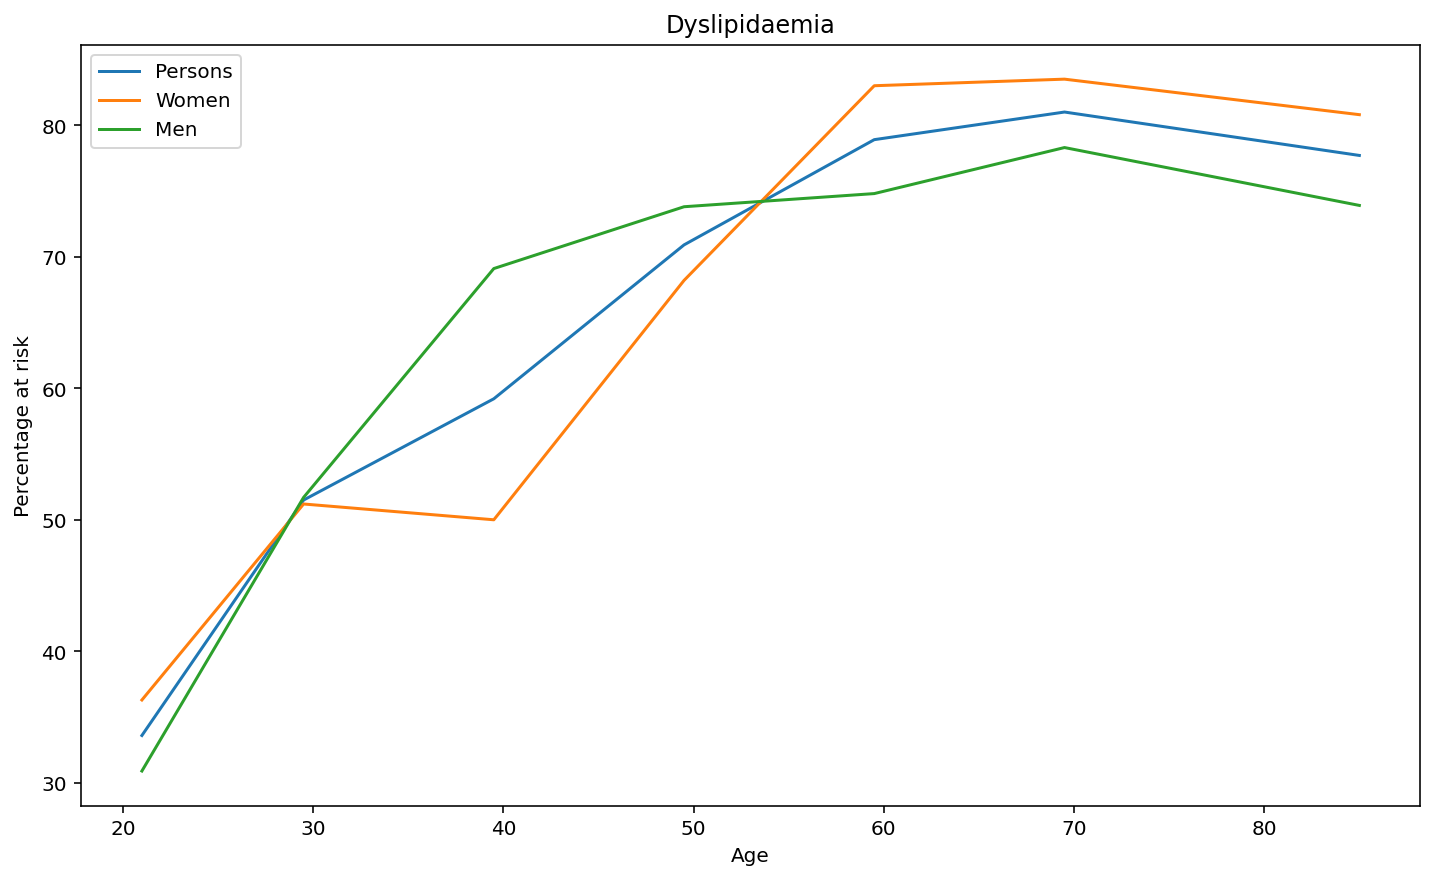

               Men     Women   Persons  Midpoint
Men       1.000000  0.860321  0.958206  0.803345
Women     0.860321  1.000000  0.970156  0.914921
Persons   0.958206  0.970156  1.000000  0.897359
Midpoint  0.803345  0.914921  0.897359  1.000000
So far, so good. Please continue with your own testing.


In [29]:
from nose.tools import assert_equal, assert_true
assert_true(np.isclose(age_correlation(5, quiet=True), 0.9189906028438024))
assert_true(np.isclose(age_correlation(6), 0.8973587216790504))
print("So far, so good. Please continue with your own testing.")

In [30]:
# Marker use only

Out of Alcohol, Smoking, Physical Activity and Dyslipidaemia risks, which would you say has:
* a strong correlation with age?
* a moderate correlation with age?
* a strong negative correlation with age?
* a moderate negative correlation with age?
* little or no correlation with age?


## More Practice!

Look for correlations between socioeconomic status and each of the risk factors.

Compare these with the age correlations. Do you find anything surprising?

## Congratulations!! 🏆

You have now worked through the essential tools to _**do** data science!_

&copy; Cara MacNish